In [1]:
# !pip install -r /work/requirements.txt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train = pd.read_csv('Train.csv')

In [4]:
test = pd.read_csv('Test.csv')

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [9]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
# from pandas_profiling import ProfileReport

In [12]:
# profile = ProfileReport(df, title="Pandas Profiling Report")

In [13]:
# profile

# Finding Missing Values

### Item Weight

In [14]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Weight'>

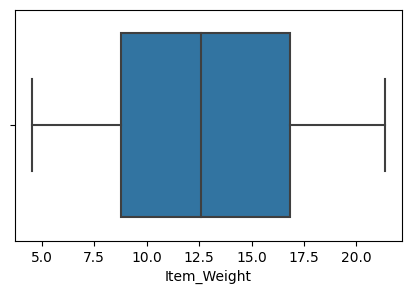

In [15]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=train, x = 'Item_Weight')

<AxesSubplot:xlabel='Item_Weight'>

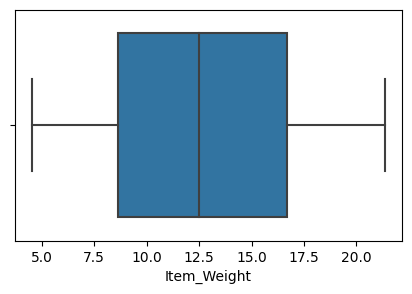

In [16]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=test, x = 'Item_Weight')

In [17]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

### Outlet Size

In [18]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [19]:
test['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

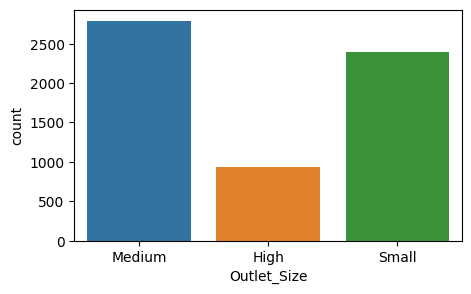

In [20]:
plt.figure(figsize=(5, 3))
sns.countplot(data=train, x='Outlet_Size')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

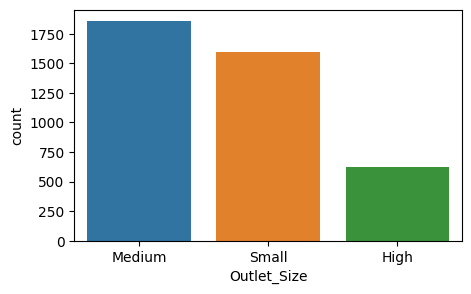

In [21]:
plt.figure(figsize=(5, 3))
sns.countplot(data=test, x='Outlet_Size')

In [22]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

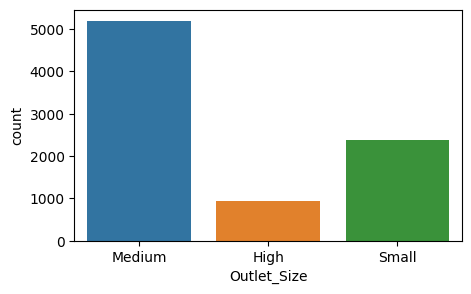

In [23]:
plt.figure(figsize=(5, 3))
sns.countplot(data=train, x='Outlet_Size')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

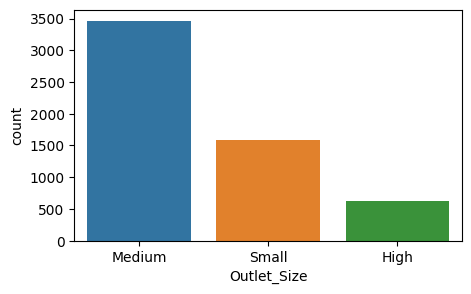

In [24]:
plt.figure(figsize=(5, 3))
sns.countplot(data=test, x='Outlet_Size')

# EDA

In [25]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Item Fat Content

In [26]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [28]:
train['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
test['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)

In [29]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

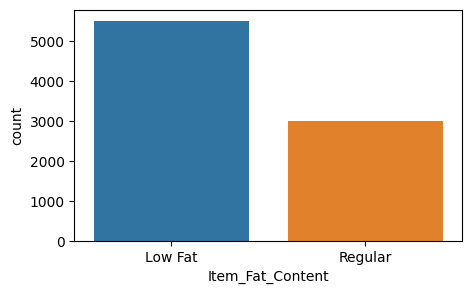

In [30]:
plt.figure(figsize=(5, 3))
sns.countplot(data=train, x='Item_Fat_Content')

### Item Type

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

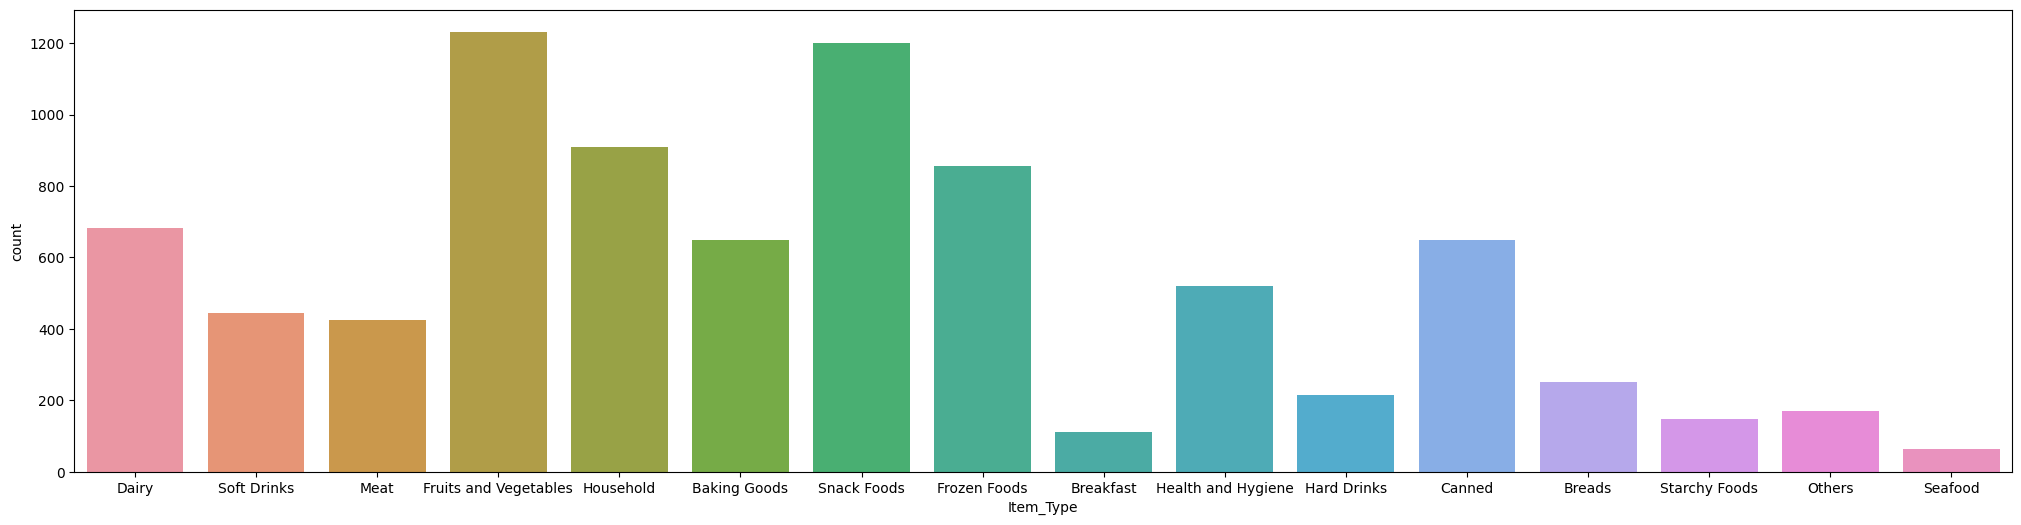

In [31]:
plt.figure(figsize=(25, 6))
sns.countplot(data=train, x='Item_Type')

### Outlet Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

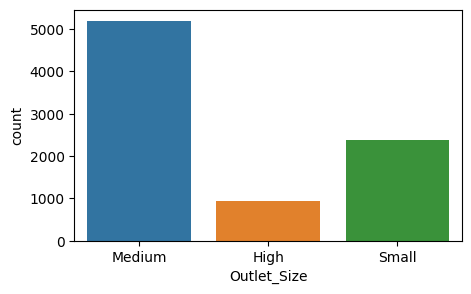

In [32]:
plt.figure(figsize=(5, 3))
sns.countplot(data=train, x='Outlet_Size')

### Outlet Type

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

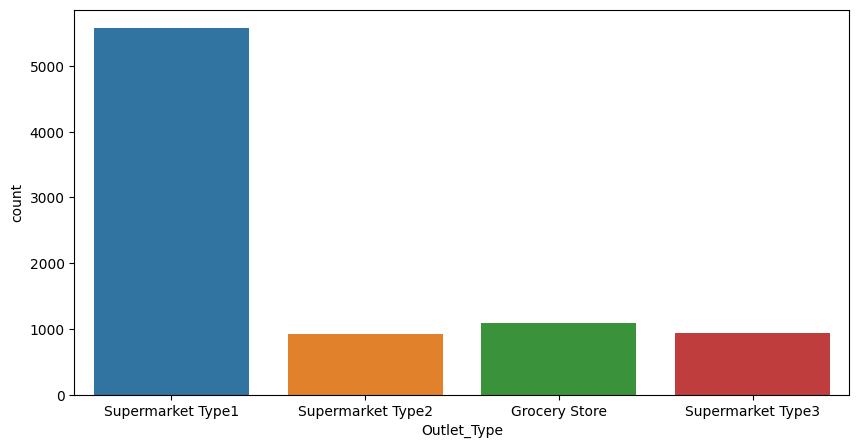

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Outlet_Type')

### Outlet Location Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

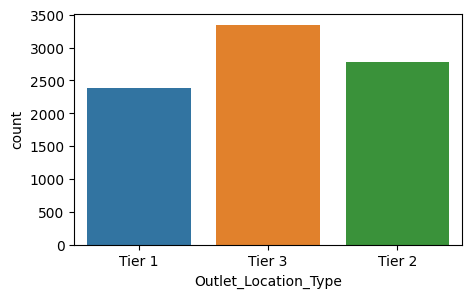

In [34]:
plt.figure(figsize=(5, 3))
sns.countplot(data=train, x='Outlet_Location_Type')

### Item Visibility

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

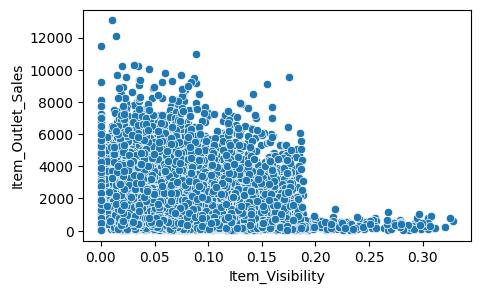

In [35]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=train, x='Item_Visibility', y='Item_Outlet_Sales')

In [36]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

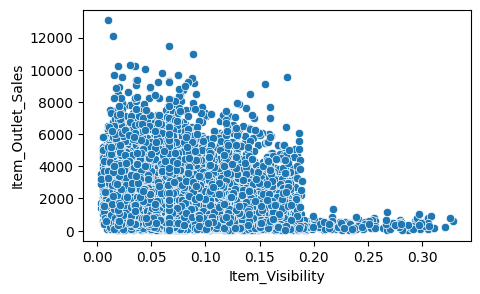

In [37]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=train, x='Item_Visibility', y='Item_Outlet_Sales')

# Creating New Columns

### Item Type Combined

In [38]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])

train['Item_Type_Combined'] = train['Item_Type_Combined'].map({
    'FD': 'Food',
    'NC': 'Non-Consumable',
    'DR': 'Drinks'
})
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({
    'FD': 'Food',
    'NC': 'Non-Consumable',
    'DR': 'Drinks'
})

### Years Established

In [39]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

# Seeing Relation b/w target column and other columns

In [40]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Combined',
       'Years_Established'],
      dtype='object')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

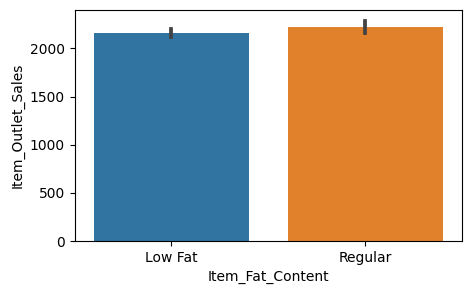

In [41]:
plt.figure(figsize=(5, 3))
sns.barplot(data=train, x='Item_Fat_Content', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

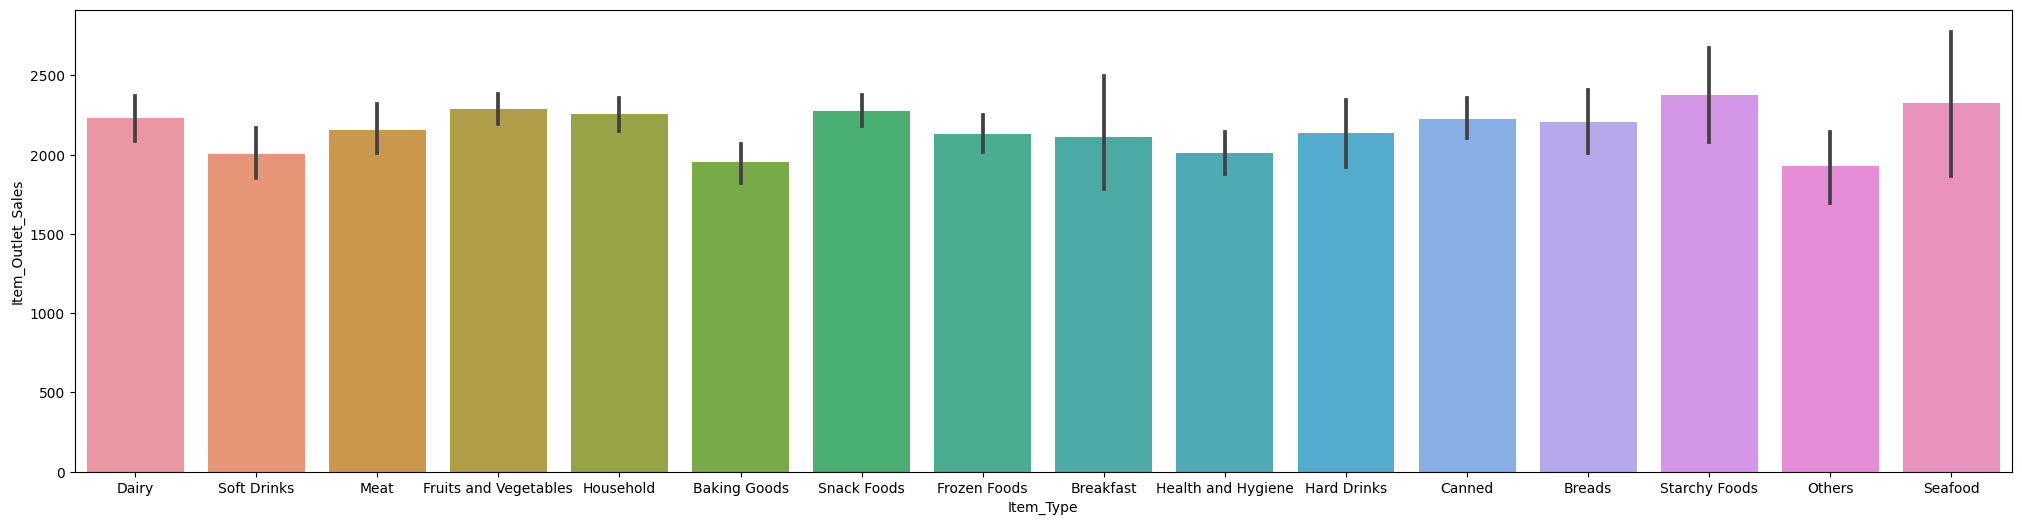

In [42]:
plt.figure(figsize=(25, 6))
sns.barplot(data=train, x='Item_Type', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Type_Combined', ylabel='Item_Outlet_Sales'>

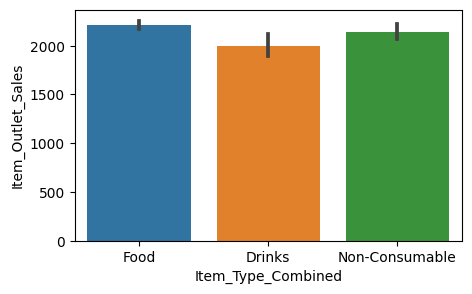

In [43]:
plt.figure(figsize=(5, 3))
sns.barplot(data=train, x='Item_Type_Combined', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

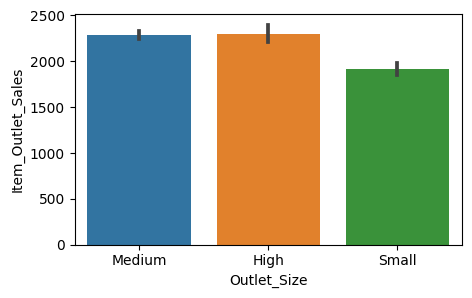

In [44]:
plt.figure(figsize=(5, 3))
sns.barplot(data=train, x='Outlet_Size', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

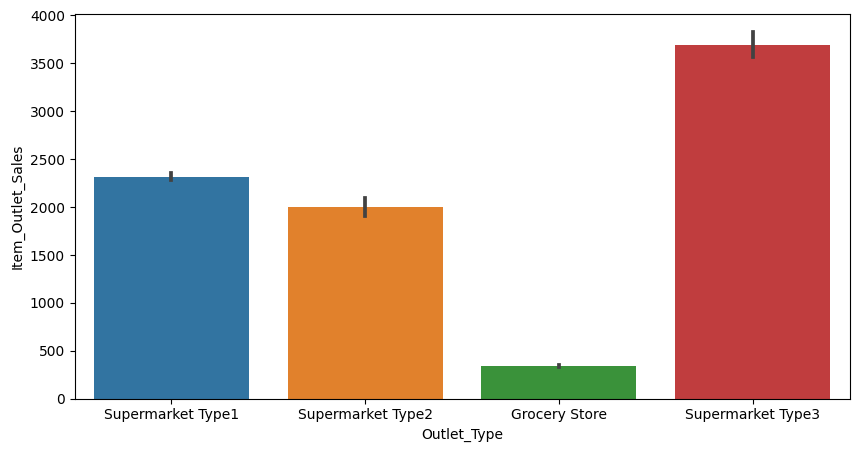

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(data=train, x='Outlet_Type', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

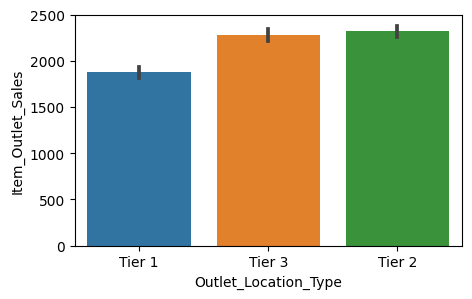

In [46]:
plt.figure(figsize=(5, 3))
sns.barplot(data=train, x='Outlet_Location_Type', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

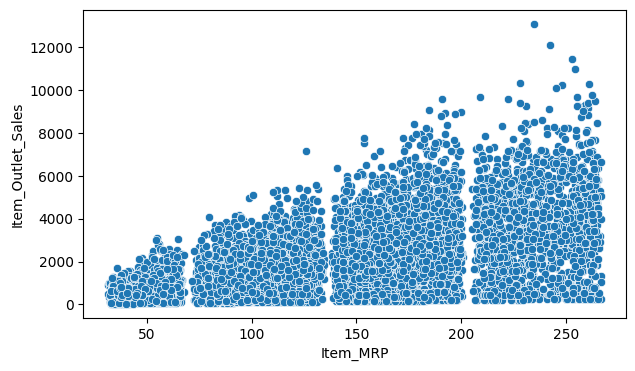

In [47]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=train, x='Item_MRP', y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

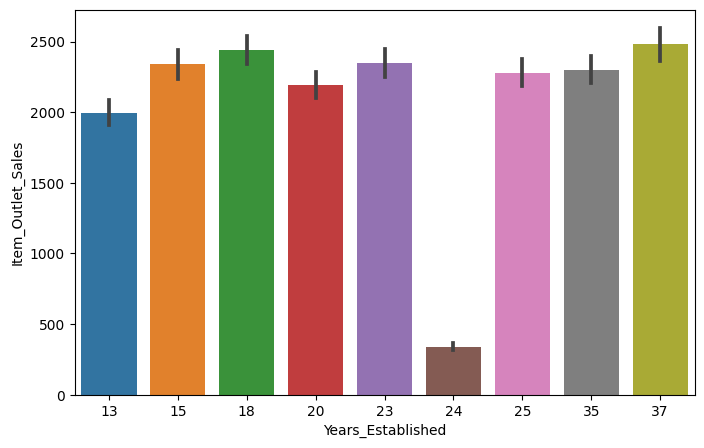

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(data=train, x='Years_Established', y='Item_Outlet_Sales')

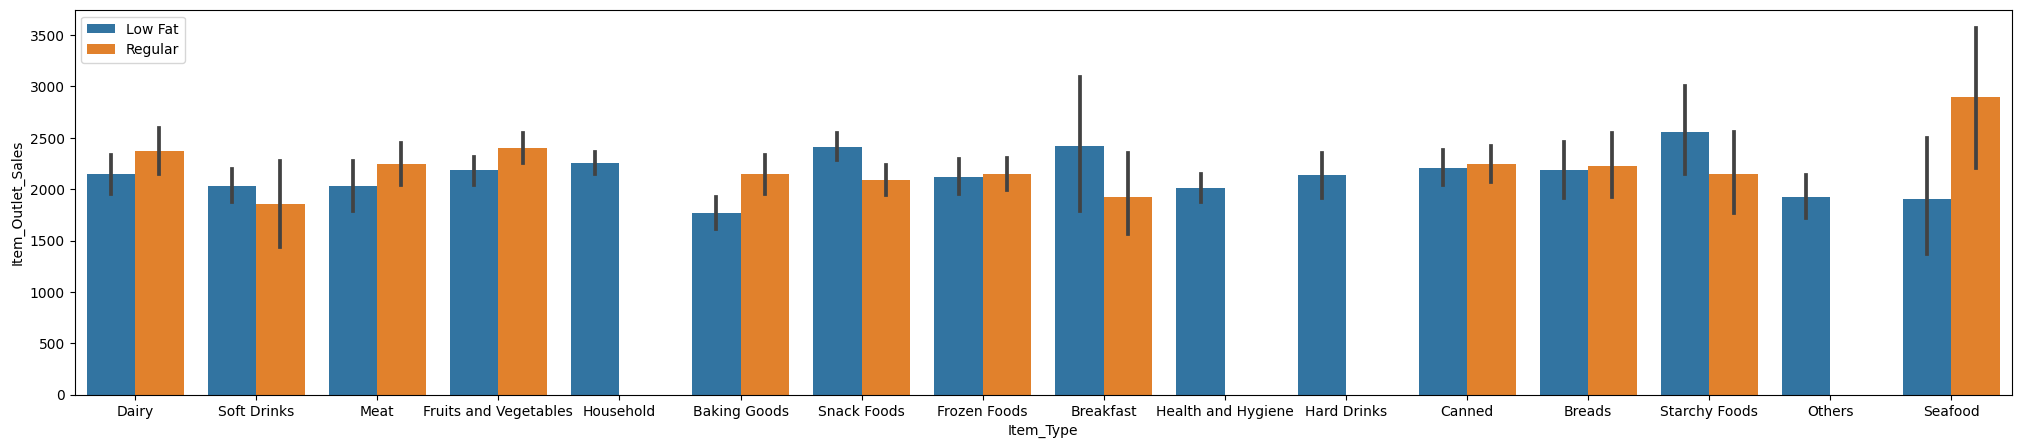

In [49]:
plt.figure(figsize=(25,5))
sns.barplot(data=train, x='Item_Type', y='Item_Outlet_Sales', hue='Item_Fat_Content')
plt.legend()

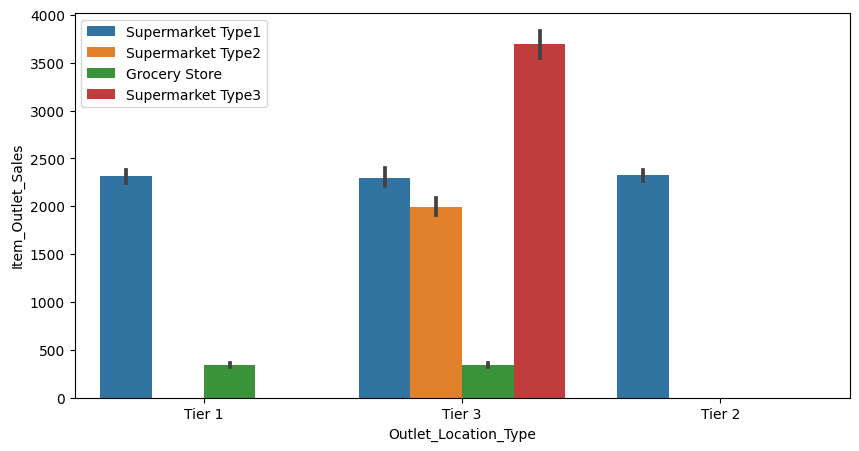

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.legend()

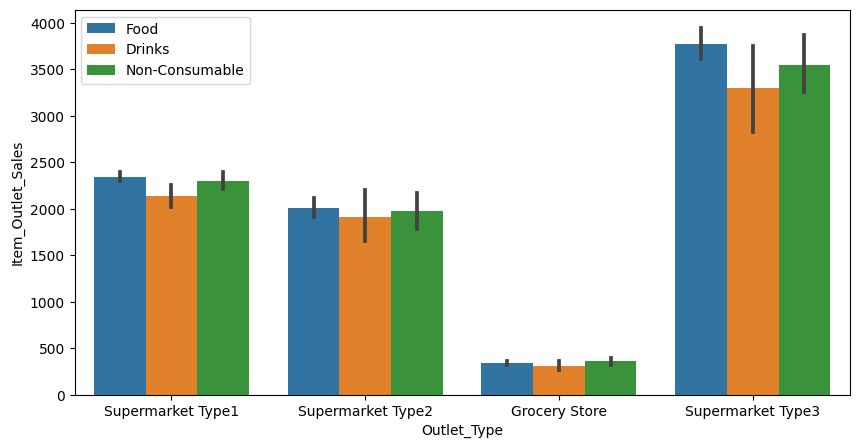

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Outlet_Type', y='Item_Outlet_Sales', hue='Item_Type_Combined')
plt.legend()

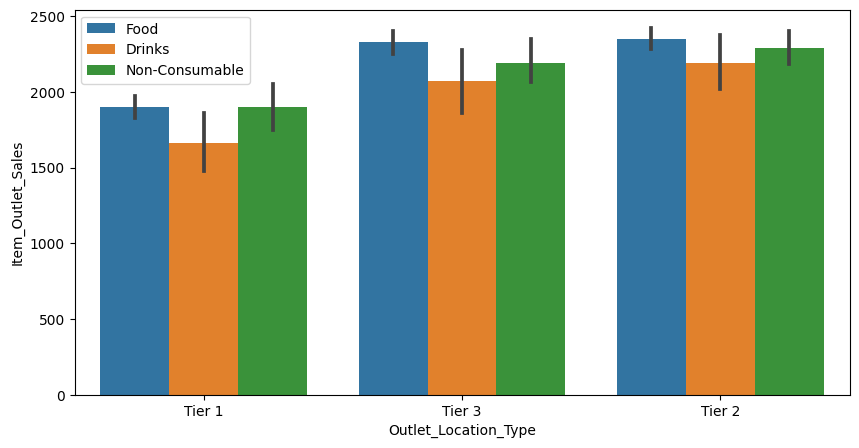

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(data=train, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Item_Type_Combined')
plt.legend()

<AxesSubplot:>

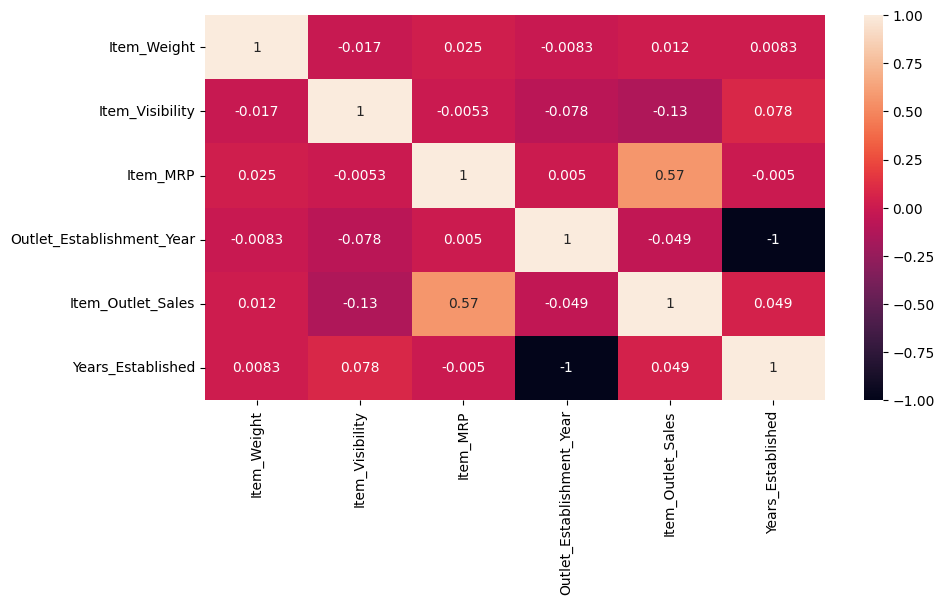

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(), annot=True)

# Feature Engineering

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,23
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,24
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,35


In [56]:
le = LabelEncoder()

In [57]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Combined',
       'Years_Established'],
      dtype='object')

In [58]:
train.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)
test.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [59]:
to_encode = ['Item_Identifier', 'Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined']

for encode in to_encode:
    train[encode] = le.fit_transform(train[encode])

for encode in to_encode:
    test[encode] = le.fit_transform(test[encode])

In [60]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Years_Established
0,156,9.30,0,0.016047,249.8092,1,0,1,3735.1380,1,23
1,8,5.92,1,0.019278,48.2692,1,2,2,443.4228,0,13
2,662,17.50,0,0.016760,141.6180,1,0,1,2097.2700,1,23
3,1121,19.20,1,0.066132,182.0950,1,2,0,732.3800,1,24
4,1297,8.93,0,0.066132,53.8614,0,2,1,994.7052,2,35


<AxesSubplot:>

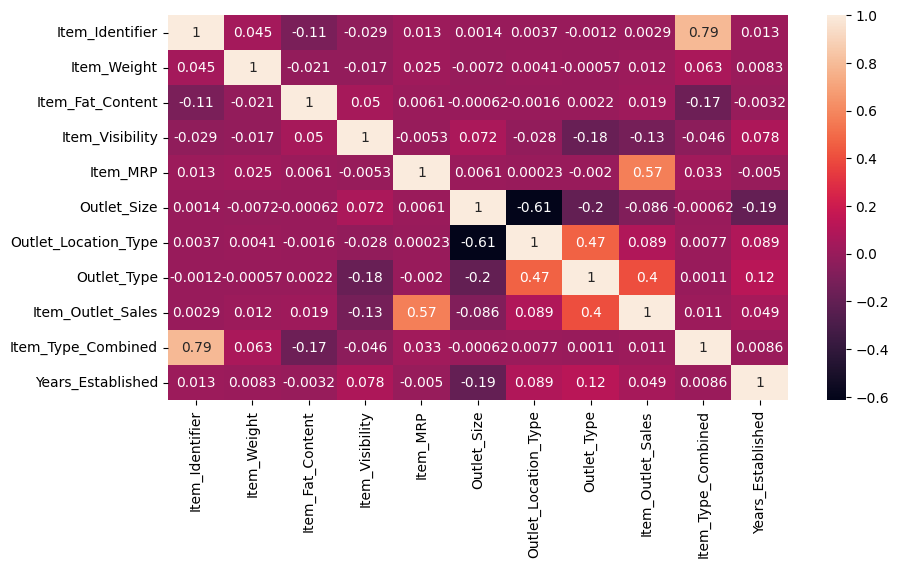

In [61]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(), annot=True)

# Model Building

### split train data

In [87]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [63]:
X = train.drop(['Item_Outlet_Sales'], axis=1)
y = train['Item_Outlet_Sales']

In [64]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Years_Established
0,156,9.300,0,0.016047,249.8092,1,0,1,1,23
1,8,5.920,1,0.019278,48.2692,1,2,2,0,13
2,662,17.500,0,0.016760,141.6180,1,0,1,1,23
3,1121,19.200,1,0.066132,182.0950,1,2,0,1,24
4,1297,8.930,0,0.066132,53.8614,0,2,1,2,35
...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,214.5218,0,2,1,1,35
8519,897,8.380,1,0.046982,108.1570,1,1,1,1,20
8520,1357,10.600,0,0.035186,85.1224,2,1,1,2,18
8521,681,7.210,1,0.145221,103.1332,1,2,2,1,13


In [65]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Years_Established
549,1102,9.500,1,0.035206,171.3448,1,0,1,1,23
7757,1322,18.000,0,0.047473,170.5422,1,1,1,2,20
764,1169,17.600,1,0.076122,111.7202,2,0,1,1,25
6867,789,8.325,0,0.029845,41.6138,1,1,1,1,20
2716,757,12.850,0,0.137228,155.5630,2,0,1,1,25


In [68]:
y_train.head()

549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
Name: Item_Outlet_Sales, dtype: float64

### Random Forest

In [69]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

# train data scores

rf_ytrain_predict = rf.predict(X_train)

rf_r2 = r2_score(y_train, rf_ytrain_predict)
rf_mse = mean_squared_error(y_train, rf_ytrain_predict)

print(f"r2 score for train data: {rf_r2}")
print(f"mse score for train data: {rf_mse}")

r2 score for train data: 0.9377081745935908
mse score for train data: 184262.3488378452


In [80]:
from math import sqrt

rf_rmse = sqrt(rf_mse)
print(rf_rmse)

1098.6487357434692


In [93]:
# test data scores
rf_ytest_predict = rf.predict(X_test)

rf_r2_test = r2_score(y_test, rf_ytest_predict)
rf_mse_test = mean_squared_error(y_test, rf_ytest_predict)

print(f"r2 score for test data: {rf_r2_test}")
print(f"mse score for test data: {rf_mse_test}")

rf_rmse_test = sqrt(rf_mse_test)
print(f"rmse test score: {rf_rmse_test}")

r2 score for test data: 0.5559078963466254
mse score for test data: 1207029.044550723
rmse test score: 1098.6487357434692


In [86]:
# feature importance
plt.figure(figsize=(8,5))
sns.barplot(rf.feature_importances_, X.columns)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 800x500 with 0 Axes>

### Random Forest Hyperparameter tuning using Grid Search CV

In [97]:
param_grid = {'n_estimators' : [100,200,500,800,1000,1200],
            'criterion': ['squared_error', 'absolute_error', 'poisson'],
           'max_depth': [3,5,7,10,15,25,40,None],
           'min_samples_split':[2,4,6,10],
           'min_samples_leaf':[2,4,6,8],
           'bootstrap': ['True', 'False'],
           }

random_serach_rf = RandomizedSearchCV(param_distributions= param_grid, cv = 5 , n_jobs=6, verbose=2, estimator = rf)
random_serach_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, criterion=poisson, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, criterion=poisson, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, criterion=poisson, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, criterion=poisson, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 2.2min
[CV] END bootstrap=True, criterion=poisson, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 2.2min
[CV] END bootstrap=True, criterion=squared_error, max_depth=10, min_samples_leaf=6, min_samples_split=6, n_estimators=1200; total time= 2.4min
[CV] END bootstrap=True, criterion=squared_error, max_depth=10, min_samples_leaf=6, min_samples_split=6, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=6,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [3, 5, 7, 10, 15, 25, 40,
                                                      None],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 200, 500, 800,
                                                         1000, 1200]},
                   verbose=2)

In [98]:
print(random_serach_rf.best_params_)
print(random_serach_rf.best_estimator_)
# print(random_serach_rf.cv_results_)
print(random_serach_rf.best_score_)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7, 'criterion': 'poisson', 'bootstrap': 'True'}
RandomForestRegressor(bootstrap='True', criterion='poisson', max_depth=7,
                      min_samples_leaf=4, n_estimators=1000)
0.589961642381865


In [101]:
rf_search = RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=500)

rf_search.fit(X_train, y_train)

# train data scores

rf_search_ytrain_predict = rf.predict(X_train)

rf_search_r2 = r2_score(y_train, rf_search_ytrain_predict)
rf_search_mse = mean_squared_error(y_train, rf_search_ytrain_predict)

print(f"r2 score for train data: {rf_search_r2}")
print(f"mse score for train data: {rf_search_mse}")

rf_search_rmse = sqrt(rf_search_mse)
print(f"rmse score: {rf_search_rmse}")

r2 score for train data: 0.9377081745935908
mse score for train data: 184262.3488378452
rmse score: 429.2579048053107


In [102]:
# test data scores

rf_search_ytest_predict = rf_search.predict(X_test)

rf_search_r2_test = r2_score(y_test, rf_search_ytest_predict)
rf_search_mse_test = mean_squared_error(y_test, rf_search_ytest_predict)

print(f"r2 score for test data: {rf_search_r2_test}")
print(f"mse score for test data: {rf_search_mse_test}")

rf_search_rmse_test = sqrt(rf_search_mse_test)
print(f"rmse test score: {rf_search_rmse_test}")

r2 score for test data: 0.6166827895357698
mse score for test data: 1041844.7040608
rmse test score: 1020.7079425873005


### Decision Tree

In [72]:
# dt = DecisionTreeRegressor()

# dt.fit(X_train, y_train)

# # test data scores
# y_predict = dt.predict(X_test)

# r2 = r2_score(y_test, y_predict)
# mse = mean_squared_error(y_test, y_predict)

In [73]:
# print(f"r2 score for test data: {r2}")
# print(f"mse score for test data: {mse}")

In [74]:
# # train data scores

# ytrain_predict = dt.predict(X_train)

# r2 = r2_score(y_train, ytrain_predict)
# mse = mean_squared_error(y_train, ytrain_predict)

# print(f"r2 score for train data: {r2}")
# print(f"mse score for train data: {mse}")

In [75]:
# calculating r2_score
# dt.score(X_test, y_test)

### Scaling the Train data set

In [76]:
# from sklearn.preprocessing import StandardScaler

### Linear Regression

In [77]:
# lr = LinearRegression()

### Elastic Net

In [78]:
# eln = ElasticNet()

### SVR

In [79]:
# sv = SVR()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=341766a6-b1cc-425f-9830-fc377f34ff67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>